In [1]:
#import some liberaries needed in this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore')

In [2]:
#get the data and save it to data variable
data = pd.read_csv('E:/SaMeH/Handsa/Machine Learning Nanodegree/Datasets/appdata10.csv')

data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [3]:
#Get inuttion about the dataset dtypes and detect null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null object
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [4]:
#Get inuttion about the dataset statistics
data.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


**Conclusion:**
* As we see from `info` function the `enrolled_date` feature has null values that we have to take care of.
* Tthere also some categorical features that need to be pre-pocessed

---

---
# Apply Feature Engineering

In the next section I'll do some Feature Engineering in order to extract more valueable features hidden in the current features. So here is these features that need **`Feature Engineering`**
* `hour`,
* `first_open`,  
* `screen_list`,

In [3]:
# copy the dataset first
new_data = data.copy()

# Get the hour
hour = new_data['hour'].str.slice(0, 3).astype(int)

# replace the old hour column by the new one
new_data['hour'] = hour

In [4]:
# get the date only from first_open column
first_open_date = new_data['first_open'].str.slice(0, 10)

# replace the old first_open column by the new one
new_data['first_open'] = first_open_date

#Extract the first open year and month
first_open_year = new_data['first_open'].str.slice(0, 4).astype(int)
first_open_month = new_data['first_open'].str.slice(5, 7).astype(int)

new_data['first_open_year'] = first_open_year
new_data['first_open_month'] = first_open_month

In [5]:
#Now I'll extract many features from screen_list feature and apply One_Hot_Encoding
#I'm not going to work with the screens associated with this dataset, 
#instead I'm going to work with the most frequently used screens.

#load the most frquently used screens and compare them to overall screens
top_screens = pd.read_csv('E:/SaMeH/Handsa/Machine Learning Nanodegree/Datasets/top_screens.csv')

#Get the values from the top_screens
top_scr = top_screens['top_screens'].values

#print the number of Features before extracting the screen_list feature
print("Number of Features before extracting the screen_list feature is: {}".format(new_data.shape[1]))

for screen in top_scr:
    new_data[screen] = data['screen_list'].str.contains(screen).astype(int)

#drop the column of screen_list from new_data
new_data.drop(['screen_list', 'user'], axis = 1, inplace = True)

print("There is {} frequently used screens".format(len(top_screens)))
print("Number of Features after extracting the screen_list feature is: {}".format(new_data.shape[1]))

Number of Features before extracting the screen_list feature is: 14
There is 58 frequently used screens
Number of Features after extracting the screen_list feature is: 70


Let's take only the numeric values in separate dataset to plot `Histograms`

In [6]:
numeric_attr = ['dayofweek', 'hour', 'numscreens', 'minigame','age',
                'used_premium_feature', 'enrolled', 'liked', 
                'first_open_year', 'first_open_month']

numeric_data = new_data[numeric_attr]

numeric_data.head()

,dayofweek,hour,numscreens,minigame,age,used_premium_feature,enrolled,liked,first_open_year,first_open_month
0,3,2,15,0,23,0,0,0,2012,12
1,6,1,13,0,24,0,0,0,2012,12
2,1,19,3,0,23,1,0,1,2013,3
3,4,16,40,0,28,0,1,0,2013,7
4,1,18,32,0,31,0,1,1,2013,2


# Correlation Testing, Gain Insight  
In the following section I'm going to plot histograms and correlation matrix and apply some technequies to complete the `Feature Engineering` process and keep the most important features

Firstly, I'll plot Histograms to see the distribution of the numeric data. 

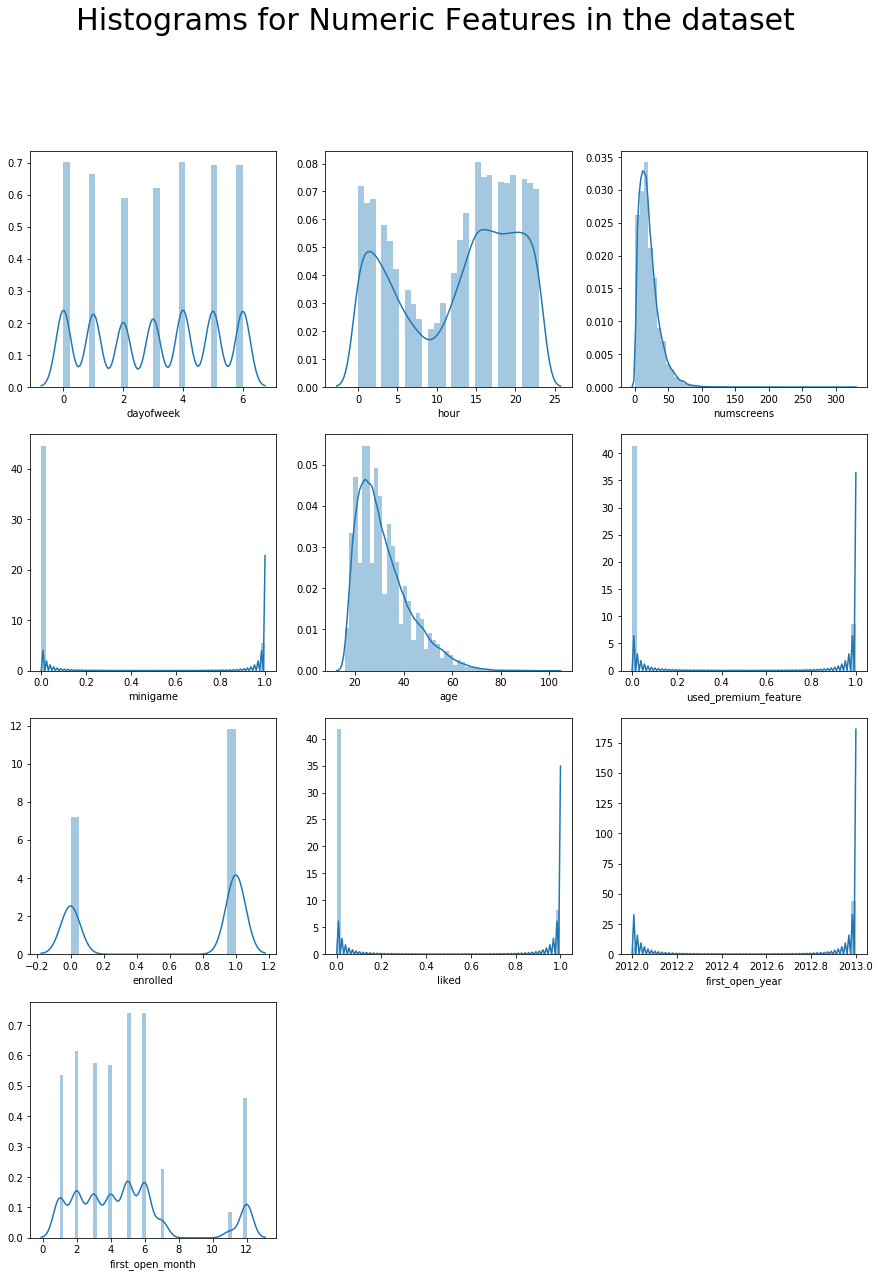

In [7]:
plt.figure(figsize = (15, 20))
plt.suptitle('Histograms for Numeric Features in the dataset', fontsize = 30)
L = list(numeric_data)
for i in range(numeric_data.shape[1]):
    plt.subplot(4, 3, i + 1)
    sns.distplot(numeric_data[L[i]])

**Let's Examine the correlation between the features and the target feature `enrolled`**

In [11]:
corr = numeric_data.corr()['enrolled'].sort_values(ascending = False)

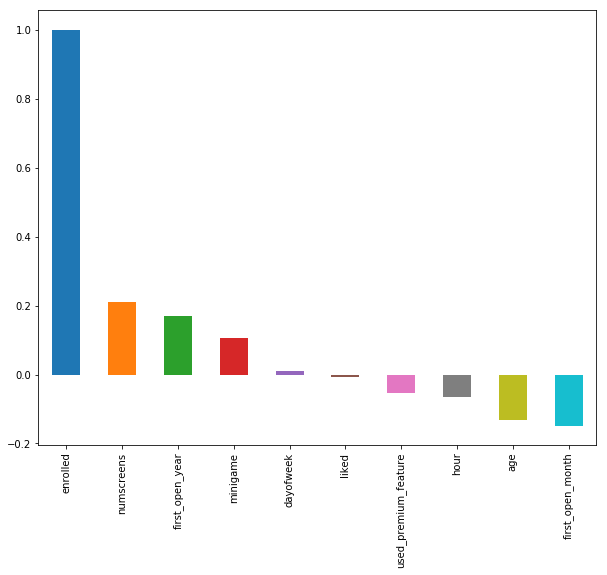

In [12]:
# plot barplot to gain intution about the relation between the features and the target
corr.plot.bar(figsize=(10,8))
plt.show()

**NOTE:** From the following Heatmap and correlation matrix we have to be careful and notice if there is a relation between the individual features?

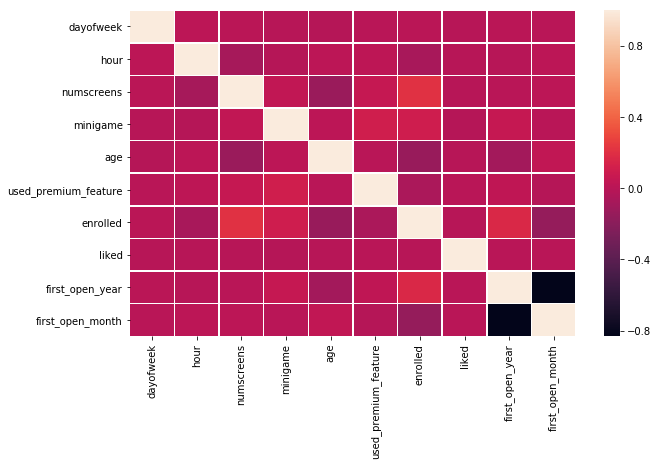

In [13]:
#Plot Heatmap to gain insights about the relations between all the features
plt.figure(figsize = (10, 6))
sns.heatmap(numeric_data.corr(), linewidth = 0.5)
plt.show()

**Conclusion:** From the correlation matrix and the heatmap above there some features that the target (enrolled) related to, and there is no dependence between the features. So the features that we have to keep with us from the numeric dataset are the following:
1. numscreens
* first_open_year
* minigame
* first_open_month
* age


---
* **Now we know the best numeric features that exist in the dataset so we are going to save them, and work only with them.**
* **Split the dataset into `features` and `target`**
* **Split the data to `trainset` and `testset`**
* **Transform the dataset using sklearn**

In [7]:
# Save the most important numeric features in attr variable
best_numeric_attr = ['numscreens', 'first_open_year', 'minigame', 'first_open_month', 'age']

#Concatenate both the numeric and categorical datasets in final_data variable
final_data = pd.concat([numeric_data[best_numeric_attr], new_data[top_scr]], axis = 1)

#target variable is enrolled 
target = numeric_data['enrolled']

print("Number of features in the final dataset is: {}".format(final_data.shape[1]))

Number of features in the final dataset is: 63


Now it is the time to transform the dataset. Transforming the data to make sure the features have the same range, and ensure they all have `Normal Distribution`
- Use StandardScalar from sklearn 

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fit transfofrm the data 
transformed_data = scaler.fit_transform(final_data)

In [9]:
# import train_test_split liberary
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_data, target, 
                                                    test_size = 0.2,
                                                    random_state = 42, shuffle = True)

print("X_Trainset size is: {}, and X_Testset size is: {}".format(X_train.shape, X_test.shape))

X_Trainset size is: (40000, 63), and X_Testset size is: (10000, 63)


# Model Selection

**This section will apply the following:**
* I'm going to select some `classification` algorithms.
* Measure `Accuracy` of these models.
* Build `Learning Curves` to detect overfitting and underfitting.
* Filter these models by testing them by ploting `learing curve` for each one.

In [10]:
#import the classification algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
#from sklearn.neighbors import KNeighborsClassifier

#Define the algorithms
decision_tree = DecisionTreeClassifier(random_state = 0)
random_forest = RandomForestClassifier(random_state = 10)
logisitc = LogisticRegression(random_state = 0)
naive = GaussianNB()

# put all estimators in one single list for later usage
estimators = [decision_tree, random_forest, logisitc, naive]

**From functions file I'll use measure_accuracy function to measure accuracies for initial selected estimators**

In [11]:
#import functions file
from functions import measure_accuracy

#measure accuracies for selected estimators
measure_accuracy(estimators, X_train, y_train)

DecisionTreeClassifier: f1_score: 0.9942781158077125, Accuracy_score: 0.9929 

RandomForestClassifier: f1_score: 0.9839664826974982, Accuracy_score: 0.9801 

LogisticRegression: f1_score: 0.8111360150996814, Accuracy_score: 0.75985 

GaussianNB: f1_score: 0.6600490196078432, Accuracy_score: 0.65325 



**Now I'm going to plot Learning curves for these estimators to see which will `overfit` and which will `underfit` and which will perform `just good`. to help me filter these models and finish the model selection process**

Precentage of work done: 25.0%
Precentage of work done: 50.0%
Precentage of work done: 75.0%
Precentage of work done: 100.0%


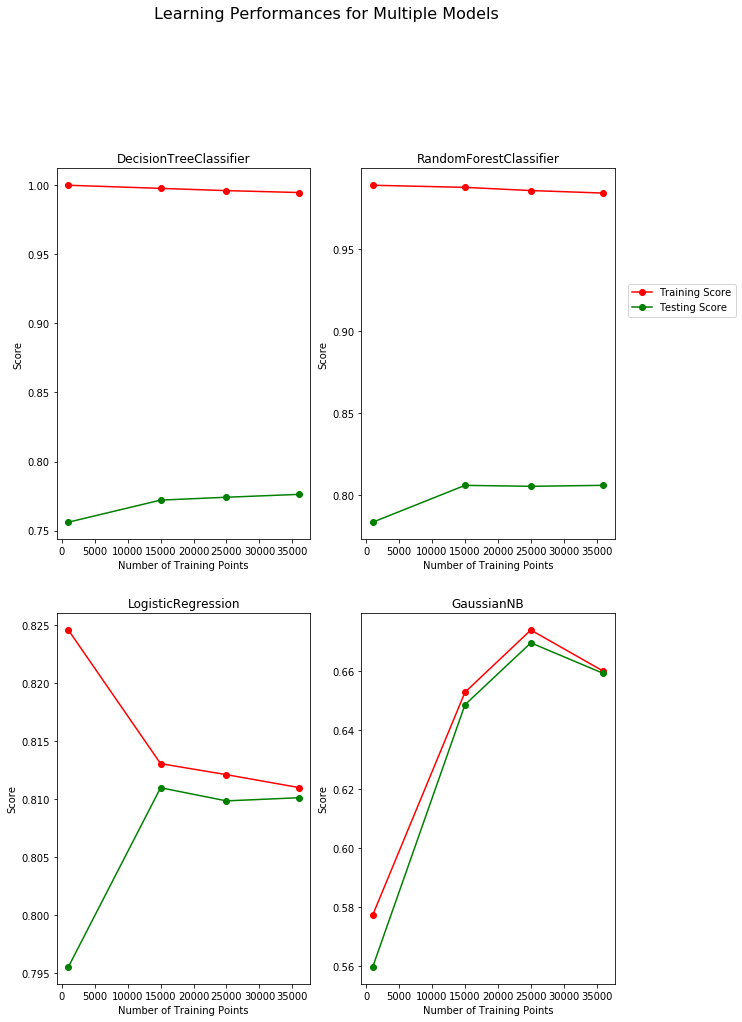

In [16]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, f1_score
from functions import plot_learning_curve

#define the training sizes for the learning curve 
train_sizes = [1000, 15000, 25000, 36000]

# make 10 folds to apply cross-validation inside learning curve function 
cv = KFold(n_splits = 10, shuffle = True, random_state = 0)

#define a scorer upon which we measure the accuracy
scorer = make_scorer(f1_score)

plot_learning_curve(estimators, X_train, y_train, train_sizes, scorer, cv)

### Conclusion:
From The above learn curves we can interpret that the best model that generalize well is `LogisticRegression` model, so I selected this model other overfitting model (to see what will happen) to send them to the next process(Fine Tune the Model)

# Fine Tune the Model
In this section of the project I'm going to measure the performance of the final model to make sure this model can go to the light.

In the following code cell I'm going to apply `GridSearchCV` for both `LogisticRegression` and `DecisionTreeClassifier`, for such time and effort consuming task I have built a function called `multi_grid_search` in `functions` file to help my apply GridSearchCV for mulitple models.

In [13]:
## Apply GridSearchCV for LogisticRegression and DecisionTree

from functions import multi_grid_search

# Define the est_1 for LogisticRegression and assign fixed paramter
est_1 = LogisticRegression(random_state = 0, n_jobs = -1, penalty = 'l1')

# Define the est_2 for DecisionTreeClassifier and assign fixed paramter
est_2 = DecisionTreeClassifier(random_state = 0)

# Define the hyper-prameters for est_1
params_1 = {'C':[1.7, 1.9, 5] ,'max_iter':[100, 300]}

# Define the hyper-prameters for est_1
params_2 = {'min_samples_split':[2, 5, 10] ,'min_samples_leaf':[2, 5, 10]}

#apply GridSearchCV for [est_1, est_2]
grids = multi_grid_search([est_1, est_2], X_train, y_train, [params_1, params_2], cv = cv, scoring = scorer)

# Get the best_estimator for est_1
best_est_1 = grids[0].best_estimator_

# Get the best_estimator for est_2
best_est_2 = grids[1].best_estimator_

#Get the best hyper-paramters for est_1
best_params_1 = grids[0].best_params_

#Get the best hyper-paramters for est_2
best_params_2 = grids[1].best_params_

#Get the best score for est_1
best_score_1 = grids[0].best_score_

#Get the best score for est_2
best_score_2 = grids[1].best_score_

#print the best score
print("The Best score for {} is: {}".format(est_1.__class__.__name__, best_score_1))

#print the best paramters
print("The Best Paramters for {} is: {}".format(est_1.__class__.__name__, best_params_1))

#print the best score
print("The Best score for {} is: {}".format(est_2.__class__.__name__, best_score_2))

#print the best paramters
print("The Best Paramters for {} is: {}".format(est_2.__class__.__name__, best_params_2))

Precentage of work done: 50.0%
Precentage of work done: 100.0%
The Best score for LogisticRegression is: 0.8101280045732746
The Best Paramters for LogisticRegression is: {'C': 1.9, 'max_iter': 100}
The Best score for DecisionTreeClassifier is: 0.8039038661903509
The Best Paramters for DecisionTreeClassifier is: {'min_samples_leaf': 10, 'min_samples_split': 2}


## Conclusion: 
According to the results of GridSearchCV (previous cell) `LogisticRegression` has highest score, but `DecisionTreeClassifier` also deos a good job. So I decided to work with both of them to drive the final result.

# Model Evaluation
In this section of the project I'm going to measure the performance of the final selected models to check which one of them will perform better than the other, and make sure this model can go to the light.
* First by Coss Validation
* Second by testset 
### Note:
for the seek of repeated-code elimination I have built a function called `multi_cross_val` to apply cross_val_score for multiple models.

In [18]:
#Evaluate the model using cross validation
from sklearn.model_selection import cross_val_score
from functions import multi_cross_val

# make list of the final selected models
test_estmaitors = [best_est_1, best_est_2]

#call the function multi_cross_val
scores = multi_cross_val(test_estmaitors, X_train, y_train, cv, scorer)

#print the results for test_estmaitors
for i, s in enumerate(scores):
    print("The average of Cross Validation Score for {} is: {}".format(test_estmaitors[i].__class__.__name__, np.mean(s)))


The average of Cross Validation Score for LogisticRegression is: 0.8101280045732746
The average of Cross Validation Score for DecisionTreeClassifier is: 0.8039038661903508


Till now `LogisticRegression` is performing better than `DecisionTreeClassifier` working with trainset, so let's see what the result on testet will be?  

In [15]:
#Evaluate the model using testset
measure_accuracy(test_estmaitors, X_test, y_test)

LogisticRegression: f1_score: 0.8100410330678252, Accuracy_score: 0.7639 

DecisionTreeClassifier: f1_score: 0.8573572321800751, Accuracy_score: 0.8289 



## Look! 
`DecisionTreeClassifier` wins over `LogisticRegression` (on testset) for both `f1_score` and `accuracy_score`

**In the next cell** I'm going to plot confusion matrix, so I have built a function called `cal_confusion_matrix` in functions file to calculate the values of true_positive, false_positive and so on.

In [19]:
from functions import cal_confusion_matrix

# predict by DecisionTreeClassifier for trainset and testset
train_pred = test_estmaitors[1].predict(X_train)
test_pred = test_estmaitors[1].predict(X_test)

#calculate confusion matrix values for both train and test predictions
names, train_confusion = cal_confusion_matrix(y_train, train_pred)
names, test_confusion = cal_confusion_matrix(y_test, test_pred)

#print confusion matrix values for train predictions
print("confusion matrix values for train predictions")
for i in range(len(names)):
    print(names[i], train_confusion[i])
    
print()

#print confusion matrix values for test predictions
print("confusion matrix values for test predictions")
for i in range(len(names)):
    print(names[i], test_confusion[i])

confusion matrix values for train predictions
True Positive 19211
False Positive 4390
False Negative 5726
True Negative 10673

confusion matrix values for test predictions
True Positive 5142
False Positive 716
False Negative 995
True Negative 3147


## Finally, 
I will plot heatmap for train and test predictions according to the final selected model in order to visually interpret the model accuarcy

In [24]:
#Build dataframe for train_confusion
conf_train = pd.DataFrame(index = ['Predict Positive', 'Predict Negative'], 
                          columns = ['Actual Positive', 'Actual Negative'])

#Assign values for corresponding rows and columns
conf_train['Actual Positive'] = train_confusion[0], train_confusion[2]
conf_train['Actual Negative'] = train_confusion[1], train_confusion[3]

#Build dataframe for test_confusion
conf_test = pd.DataFrame(index = ['Predict Positive', 'Predict Negative'], 
                          columns = ['Actual Positive', 'Actual Negative'])

#Assign values for corresponding rows and columns
conf_test['Actual Positive'] = test_confusion[0], test_confusion[2]
conf_test['Actual Negative'] = test_confusion[1], test_confusion[3]

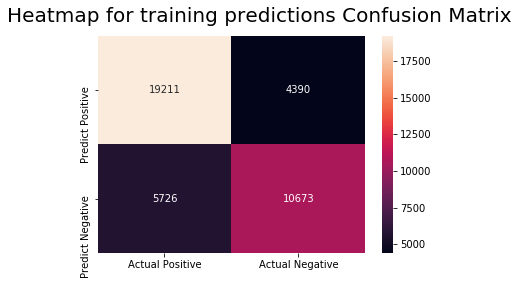

In [25]:
plt.suptitle("Heatmap for training predictions Confusion Matrix", fontsize = 20)
sns.heatmap(conf_train, annot=True, fmt="d")
plt.show()

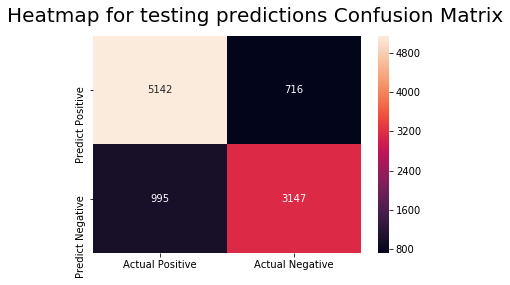

In [27]:
plt.suptitle("Heatmap for testing predictions Confusion Matrix", fontsize = 20)
sns.heatmap(conf_test, annot=True, fmt="d")
plt.show()

In [28]:
# The final model is:
print(test_estmaitors[1])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')
